In [1]:
import pandas as pd
import numpy as np
from numpy import diff
import matplotlib.pyplot as plt
from datetime import datetime
from pandas_datareader.data import DataReader
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import nltk
import io
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
pd.options.mode.chained_assignment = None

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start='2015-01-01', end=datetime.now())

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(100)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-02-04,2059.800049,2015.369995,2029.880005,2049.669922,5289300.0,2049.669922,AMAZON
2020-02-05,2071.020020,2032.000000,2071.020020,2039.869995,4376200.0,2039.869995,AMAZON
2020-02-06,2056.300049,2024.800049,2041.020020,2050.229980,3183000.0,2050.229980,AMAZON
2020-02-07,2098.530029,2038.099976,2041.989990,2079.280029,5095300.0,2079.280029,AMAZON
2020-02-10,2135.600098,2084.959961,2085.010010,2133.909912,5056200.0,2133.909912,AMAZON
...,...,...,...,...,...,...,...
2020-06-19,2697.429932,2659.000000,2678.080078,2675.010010,5777000.0,2675.010010,AMAZON
2020-06-22,2715.000000,2669.000000,2684.500000,2713.820068,3208800.0,2713.820068,AMAZON
2020-06-23,2783.110107,2718.040039,2726.020020,2764.409912,4231700.0,2764.409912,AMAZON


In [3]:
ma_day = [3, 7, 10, 15, 25]

for ma in ma_day:
    for i in company_list:
        column_name = f"MA for {ma} days"
        i[column_name] = i['Adj Close'].rolling(ma).mean()
print(i.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 3 days', 'MA for 7 days', 'MA for 10 days', 'MA for 15 days',
       'MA for 25 days'],
      dtype='object')


In [4]:
#for i in company_list:
  #print(i)


In [5]:
#for i in company_list:
  #i = .filter(['Open','Adj Close','Volume', ])
  #print(i)

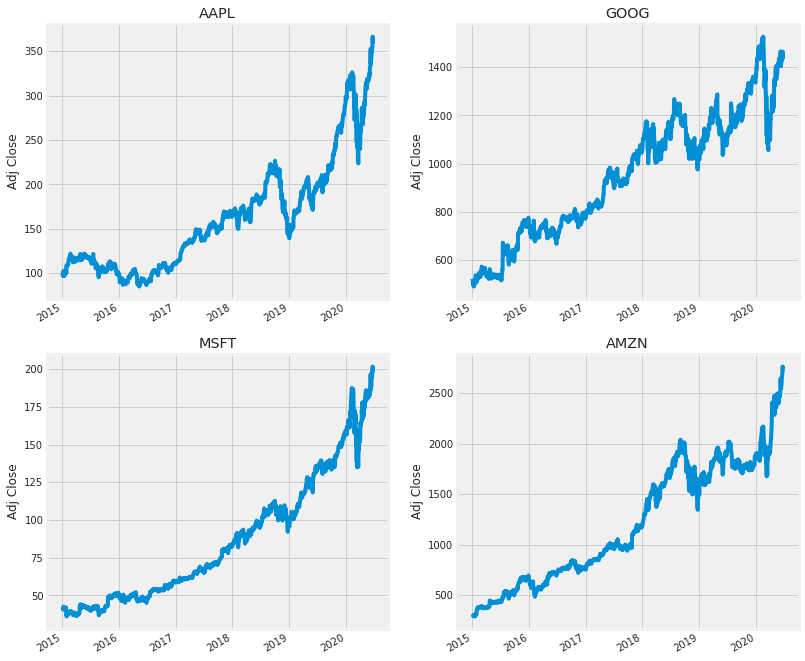

In [6]:
# Let's see a historical view of the closing price


plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")



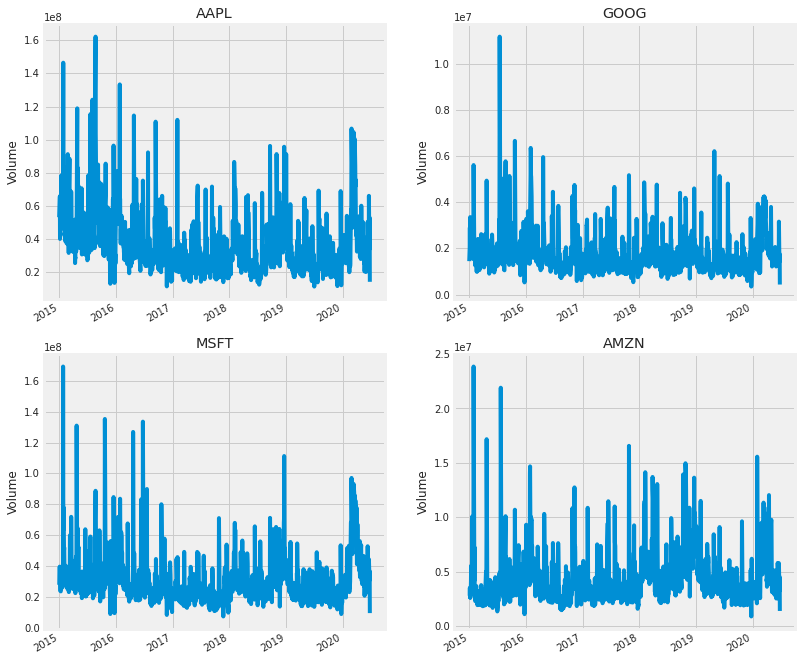

In [7]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

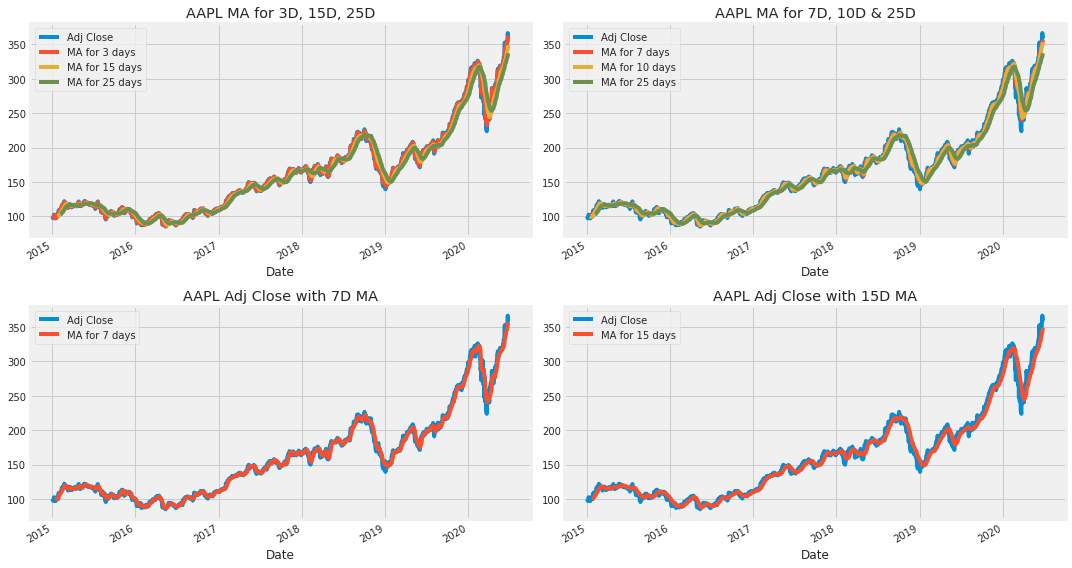

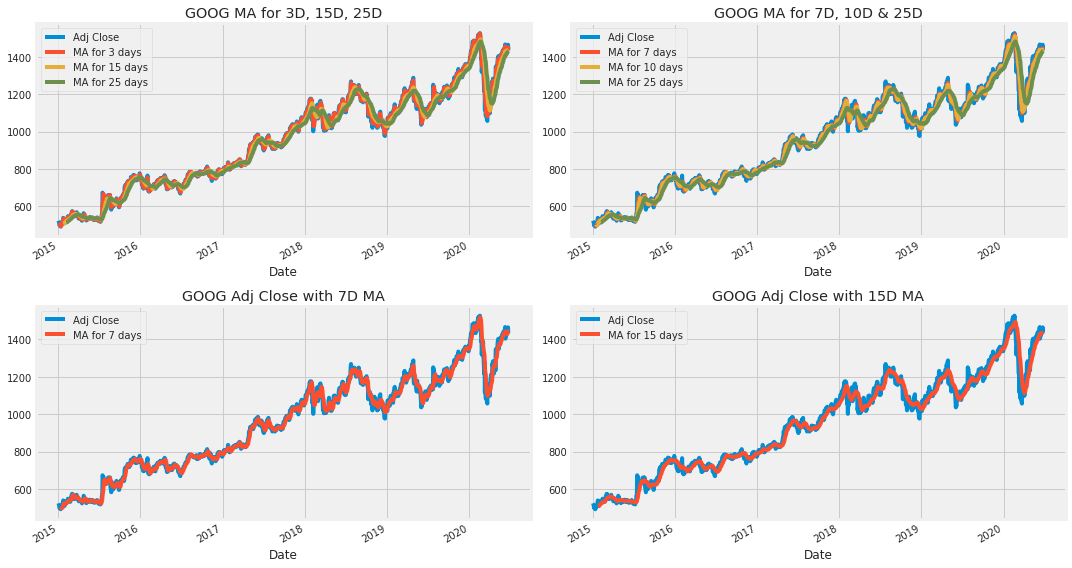

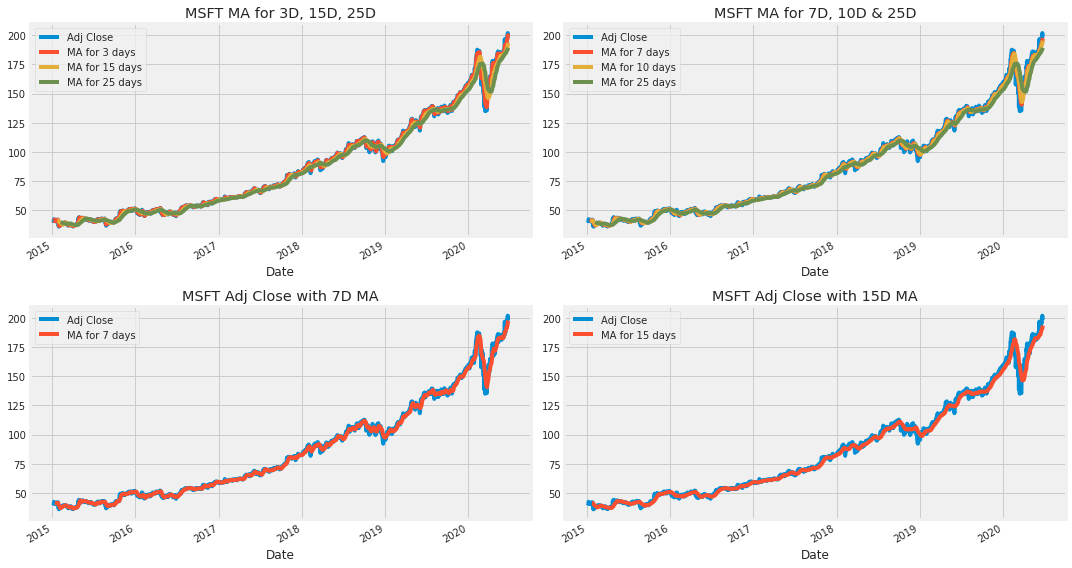

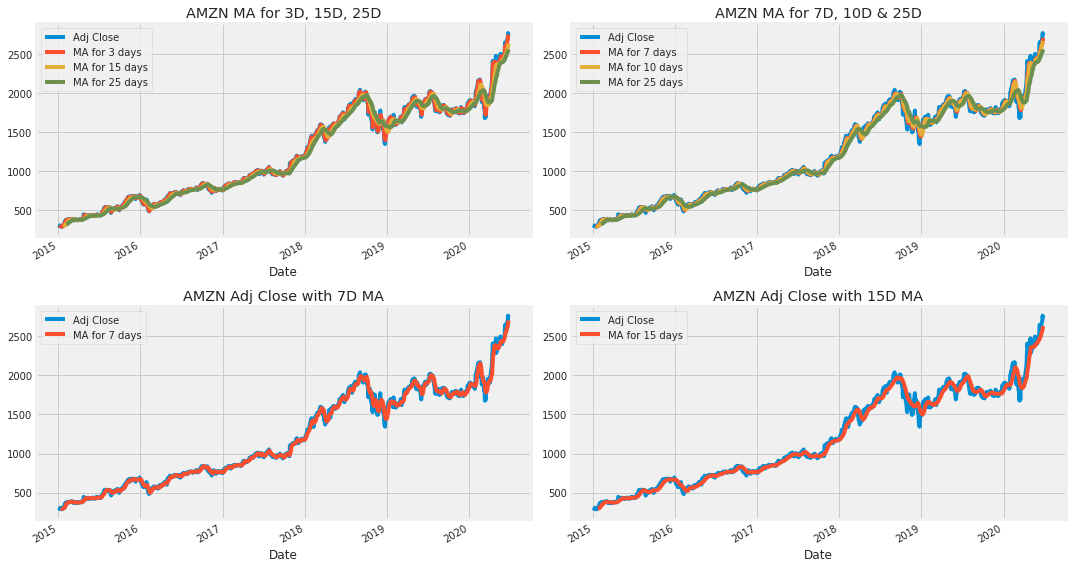

In [8]:
 
 
 for idx, i in enumerate(company_list): 
  fig, axes = plt.subplots(nrows=2, ncols=2)
  fig.set_figheight(8)
  fig.set_figwidth(15)

  # i[['Adj Close', 'MA for 3 days', 'MA for 15 days', 'MA for 25 days']].plot(ax=axes[0,0])
  # axes[0,0].set_title(str(i['company_name'][5])+' MA for 3D, 15D, 25D')

  i[['Adj Close', 'MA for 3 days', 'MA for 15 days', 'MA for 25 days']].plot(ax=axes[0,0])
  axes[0,0].set_title(tech_list[idx]+' MA for 3D, 15D, 25D')

  i[['Adj Close', 'MA for 7 days', 'MA for 10 days', 'MA for 25 days']].plot(ax=axes[0,1])
  axes[0,1].set_title(tech_list[idx]+' MA for 7D, 10D & 25D')

  i[['Adj Close', 'MA for 7 days']].plot(ax=axes[1,0])
  axes[1,0].set_title(tech_list[idx] + ' Adj Close with 7D MA')

  i[['Adj Close','MA for 15 days']].plot(ax=axes[1,1])
  axes[1,1].set_title(tech_list[idx] +' Adj Close with 15D MA')

  fig.tight_layout()

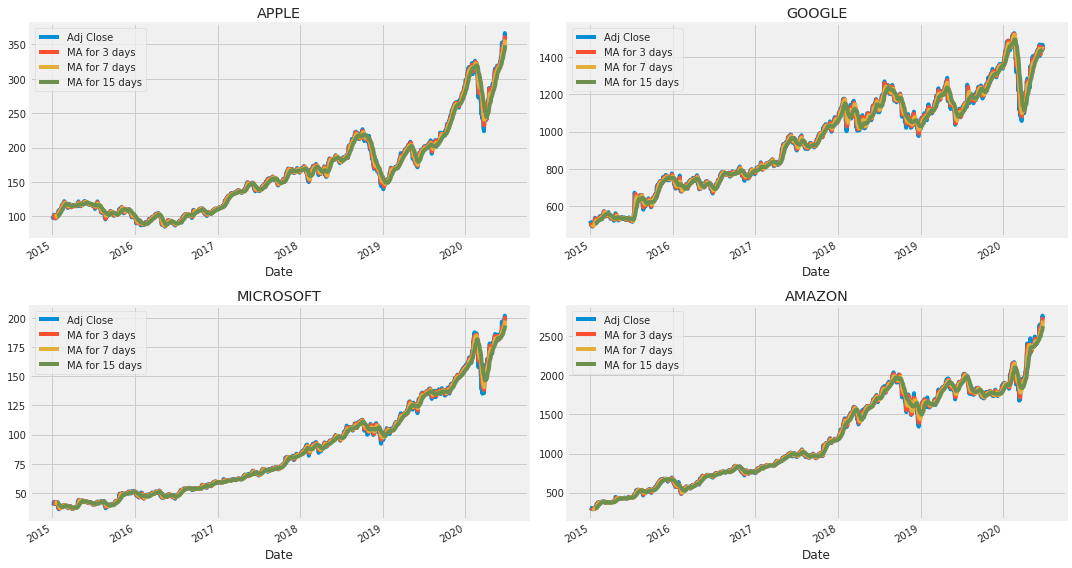

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 3 days', 'MA for 7 days', 'MA for 15 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 3 days', 'MA for 7 days', 'MA for 15 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 3 days', 'MA for 7 days', 'MA for 15 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 3 days', 'MA for 7 days', 'MA for 15 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

In [10]:
for i in company_list:
  print(i.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 3 days', 'MA for 7 days', 'MA for 10 days', 'MA for 15 days',
       'MA for 25 days'],
      dtype='object')
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 3 days', 'MA for 7 days', 'MA for 10 days', 'MA for 15 days',
       'MA for 25 days'],
      dtype='object')
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 3 days', 'MA for 7 days', 'MA for 10 days', 'MA for 15 days',
       'MA for 25 days'],
      dtype='object')
Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 3 days', 'MA for 7 days', 'MA for 10 days', 'MA for 15 days',
       'MA for 25 days'],
      dtype='object')


In [11]:
print('For time series ananlysis, we need the data to be stationary \n')
print('H1 : NULL : Data is non - stationery. Reject if value close to 0.05, do not reject depending on the result \n' + 'H2: Alternative : Do not reject H1 \n')

for idx, i in enumerate(company_list):
  print('Run a hypothesis test on '+tech_list[idx]+' data \n')
  results = adfuller(i['Adj Close'], regression='ct', autolag='AIC')
  results2 = adfuller(i['Adj Close'], regression='ct', autolag='BIC')
  print('With autolag set to AIC  : ' + str(results)+'\n')
  print('With autolag set to BIC  : ' + str(results2)+'\n')
  print('The first value is the test statistic :\n'+ 'With AIC : ' + str(results[0]) + '\nWith BIC : ' +str(results2[0]) +'\nThe more negative the number, the more stationery the data is. Clearly its not stationery\n') 
  print('The second value is the test p-value : \n'+ 'With AIC : ' + str(results[1]) + '\nWith BIC : ' +str(results2[1]) + '\nIf it is below 0.05, we reject the null hypothesis : Data is non - stationery. \nSince the value is over 0.05, we do not reject the null\n') 
  print('The fourth value {dictionary} is the critical values of p at 0.01, 0.05 0.1 :\n'+ 'With AIC : ' + str(results[4]) + '\nWith BIC : ' + str(results2[4]) + '\nHere at 0.05 p value we needed the result to be closer to the result for 5%\n')



For time series ananlysis, we need the data to be stationary 

H1 : NULL : Data is non - stationery. Reject if value close to 0.05, do not reject depending on the result 
H2: Alternative : Do not reject H1 

Run a hypothesis test on AAPL data 

With autolag set to AIC  : (-1.7297175210500373, 0.7376220781031616, 18, 1361, {'1%': -3.9654372005936893, '5%': -3.413720759538288, '10%': -3.128951907414423}, 7128.688656132566)

With autolag set to BIC  : (-0.908887705123063, 0.9551943134795399, 9, 1370, {'1%': -3.9653933006145015, '5%': -3.4136995035002973, '10%': -3.1289393991878987}, 7197.2709188926165)

The first value is the test statistic :
With AIC : -1.7297175210500373
With BIC : -0.908887705123063
The more negative the number, the more stationery the data is. Clearly its not stationery

The second value is the test p-value : 
With AIC : 0.7376220781031616
With BIC : 0.9551943134795399
If it is below 0.05, we reject the null hypothesis : Data is non - stationery. 
Since the value is o

In [12]:
for i in company_list:
  i.rename(columns= {'Adj Close': 'AdjClose', 'MA for 3 days' : 'MA3D','MA for 7 days' : 'MA7D','MA for 15 days' : 'MA15D'}, inplace=True)
  i.drop(columns=['Close', 'MA for 10 days', 'MA for 25 days'], inplace=True)

MSFTmax=(MSFT['AdjClose'].max())
AAPLmax=(AAPL['AdjClose'].max())
GOOGmax=(GOOG['AdjClose'].max())
AMZNmax=(AMZN['AdjClose'].max())
print(MSFTmax,GOOGmax,AMZNmax,AAPLmax)

201.91000366210938 1526.68994140625 2764.409912109375 366.5299987792969


In [13]:
for i in company_list:
  i['High'] = i['High'].div(i['High'].max()) 
  i['Low'] = i['Low'].div(i['Low'].max())
  i['Open'] = i['Open'].div(i['Open'].max())
  i['Volume'] = i['Volume'].div(i['Volume'].max())
  i['AdjClose']=i['AdjClose'].div(i['AdjClose'].max())
  i['MA3D'] = i['MA3D'].div(i['MA3D'].max())
  i['MA7D'] = i['MA7D'].div(i['MA7D'].max())
  i['MA15D'] = i['MA15D'].div(i['MA15D'].max())
  print(i.describe())


              High          Low  ...         MA7D        MA15D
count  1380.000000  1380.000000  ...  1374.000000  1366.000000
mean      0.453628     0.457413  ...     0.452912     0.462749
std       0.162581     0.162775  ...     0.171556     0.173164
min       0.246173     0.246971  ...     0.242823     0.250973
25%       0.316733     0.320424  ...     0.306641     0.313860
50%       0.423546     0.427927  ...     0.424120     0.433140
75%       0.537562     0.544111  ...     0.548081     0.558613
max       1.000000     1.000000  ...     1.000000     1.000000

[8 rows x 8 columns]
              High          Low  ...         MA7D        MA15D
count  1380.000000  1380.000000  ...  1374.000000  1366.000000
mean      0.627026     0.620010  ...     0.627276     0.637867
std       0.168682     0.166316  ...     0.167381     0.168612
min       0.322835     0.319591  ...     0.327636     0.340234
25%       0.486259     0.483737  ...     0.488719     0.496802
50%       0.637126     0.633426  

In [14]:
print('For time series stock ananlysis, we need the data to be stationary \n')
print('H1 : NULL : Data is non - stationery. Reject if value close to 0.05, do not reject depending on the result \n' + 'H2: Alternative : Do not reject H1 \n')

for idx, i in enumerate(company_list):
  print('Run a hypothesis test '+tech_list[idx]+' data \n')
  results = adfuller(i['AdjClose'], regression='ct', autolag='AIC')
  results2 = adfuller(i['AdjClose'], regression='ct', autolag='BIC')
  print('With autolag set to AIC  : ' + str(results)+'\n')
  print('With autolag set to BIC  : ' + str(results2)+'\n')
  print('The first value is the test statistic :\n'+ 'With AIC : ' + str(results[0]) + '\nWith BIC : ' +str(results2[0]) +'\nThe more negative the number, the more stationery the data is. Finally, our data stationery\n')  
  print('The fourth value {dictionary} is the critical values of p at 0.01, 0.05 0.1 :\n'+ 'With AIC : ' + str(results[4]) + '\nWith BIC : ' + str(results2[4]) + '\nHere at 0.05 p value we needed the result to be closer to the result for 5%\n')


For time series stock ananlysis, we need the data to be stationary 

H1 : NULL : Data is non - stationery. Reject if value close to 0.05, do not reject depending on the result 
H2: Alternative : Do not reject H1 

Run a hypothesis test AAPL data 

With autolag set to AIC  : (-1.7297175210589586, 0.7376220780991247, 18, 1361, {'1%': -3.9654372005936893, '5%': -3.413720759538288, '10%': -3.128951907414423}, -8871.369146662602)

With autolag set to BIC  : (-0.908887705125608, 0.9551943134792618, 9, 1370, {'1%': -3.9653933006145015, '5%': -3.4136995035002973, '10%': -3.1289393991878987}, -8802.786883902552)

The first value is the test statistic :
With AIC : -1.7297175210589586
With BIC : -0.908887705125608
The more negative the number, the more stationery the data is. Finally, our data stationery

The fourth value {dictionary} is the critical values of p at 0.01, 0.05 0.1 :
With AIC : {'1%': -3.9654372005936893, '5%': -3.413720759538288, '10%': -3.128951907414423}
With BIC : {'1%': -3.965

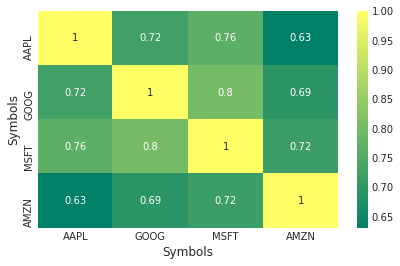

In [15]:
corr_df = DataReader(tech_list, 'yahoo', start='2017-01-01', end=datetime.now())['Adj Close']
tech_rets = corr_df.pct_change()
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

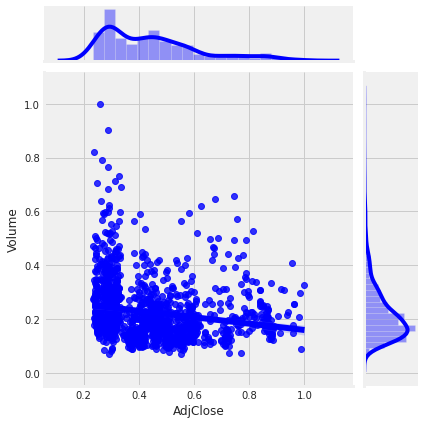

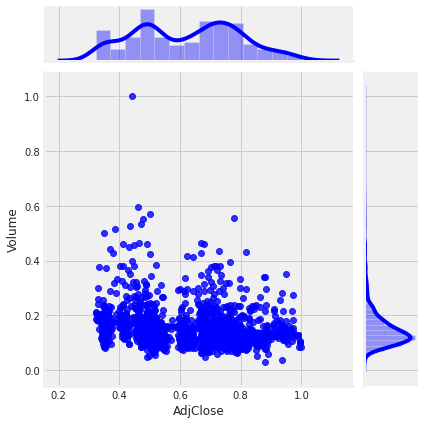

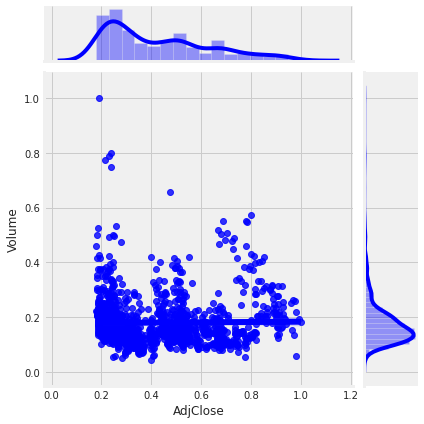

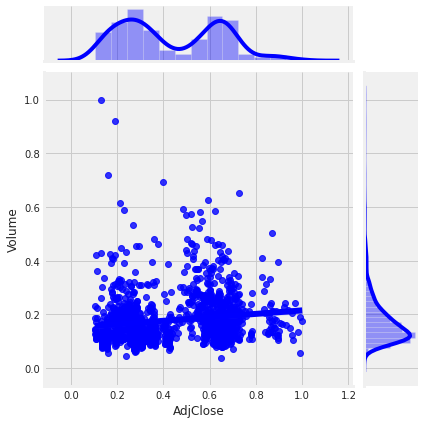

In [16]:
for i in company_list:
  sns.jointplot(i['AdjClose'], i['Volume'], i, kind='reg', color='blue')

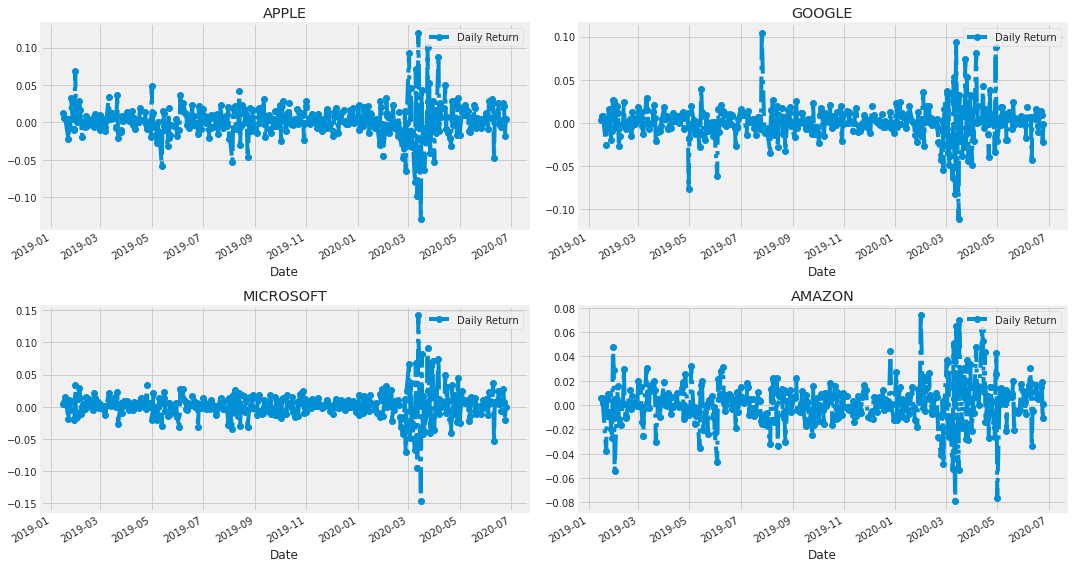

In [17]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['AdjClose'].tail(365).pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='-.', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='-.', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='-.', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='-.', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

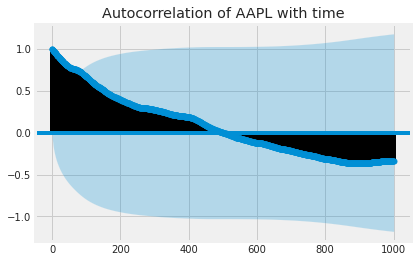

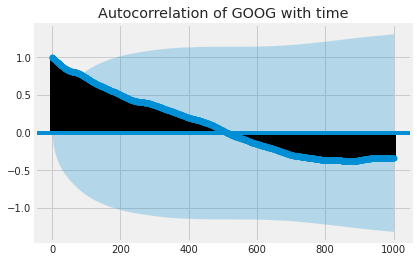

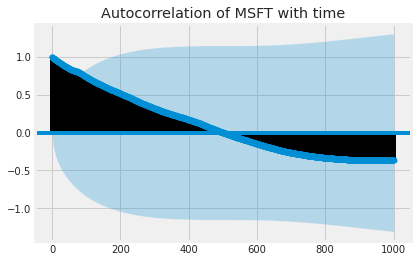

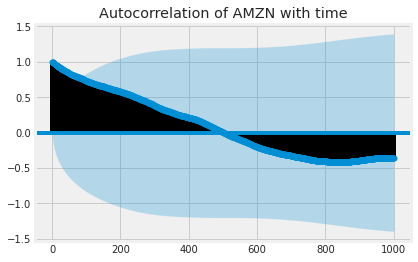

In [18]:
for idx, i in enumerate(company_list):
  plot_acf(i['AdjClose'],lags=1000, alpha=0.01, title='Autocorrelation of ' + tech_list[idx]+ ' with time')

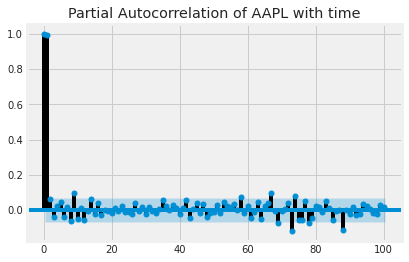

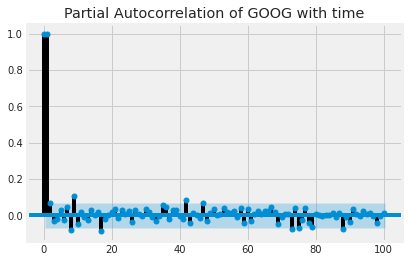

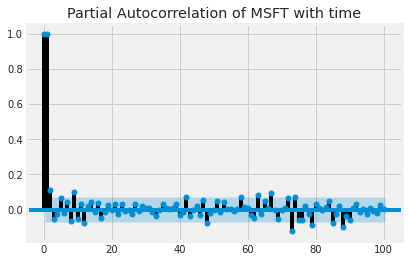

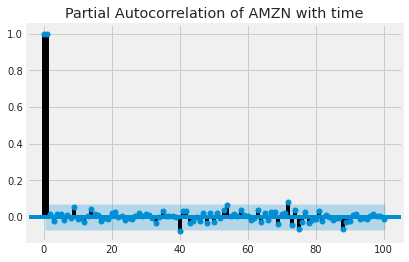

In [19]:
for idx, i in enumerate(company_list):
  plot_pacf(i['AdjClose'],lags=100, alpha=0.01, title='Partial Autocorrelation of ' + tech_list[idx]+ ' with time')

In [20]:
for i in company_list:
  i.drop(columns=['company_name','Daily Return'], inplace=True)
  i = i.tail(1242)

In [21]:
sentiments = pd.read_csv('sentiments.csv',encoding='latin-1')
print(sentiments)

      posneg  polarity  subjectivity
0          0  0.196275      0.803725
1          1  0.528791      0.471209
2          1  0.966704      0.033296
3          1  0.887238      0.112762
4          1  0.704519      0.295481
...      ...       ...           ...
1237       0  0.182273      0.817727
1238       1  0.835548      0.164452
1239       1  0.888156      0.111844
1240       1  0.958147      0.041853
1241       0  0.421720      0.578280

[1242 rows x 3 columns]


In [22]:
new_company_list = []

for i in company_list:
  new_frame = i.tail(1242) 
  new_frame['posneg'] = sentiments['posneg'].values
  new_frame['polarity'] = sentiments['polarity'].values
  new_frame['subjectivity'] = sentiments['subjectivity'].values
  new_frame.to_csv('companysents.csv', sep=',')
  new_company_list.append(new_frame)

In [23]:
companysents = pd.read_csv('companysents.csv',encoding='latin-1')
print(companysents)

            Date      High       Low  ...  posneg  polarity  subjectivity
0     2015-07-22  0.176144  0.178207  ...       0  0.196275      0.803725
1     2015-07-23  0.175844  0.174825  ...       1  0.528791      0.471209
2     2015-07-24  0.207643  0.194542  ...       1  0.966704      0.033296
3     2015-07-27  0.194903  0.193532  ...       1  0.887238      0.112762
4     2015-07-28  0.191842  0.192253  ...       1  0.704519      0.295481
...          ...       ...       ...  ...     ...       ...           ...
1237  2020-06-19  0.964746  0.977214  ...       0  0.182273      0.817727
1238  2020-06-22  0.971030  0.980889  ...       1  0.835548      0.164452
1239  2020-06-23  0.995390  0.998912  ...       1  0.888156      0.111844
1240  2020-06-24  1.000000  1.000000  ...       1  0.958147      0.041853
1241  2020-06-25  0.983190  0.996758  ...       0  0.421720      0.578280

[1242 rows x 12 columns]


In [24]:
for idx, stock_name in enumerate(tech_list):
  globals()[stock_name] = new_company_list[idx]

In [25]:
print(AAPL)

for i in new_company_list:

  testPct = 20
  train_size = int (len(i.index) * ((100 - testPct)/100))
  trainDf = i[0:train_size+1]
  testDf = i[train_size:len(i.index)]

  print(i.columns)
  print(trainDf)
  print(testDf)

  Ytrain = trainDf['AdjClose']
  Ytest = testDf['AdjClose']
  print(Ytrain)
  print(Ytest)

  Xtrain = trainDf.drop(columns=['AdjClose'])
  print(Xtrain)
  Xtest = testDf.drop(columns='AdjClose')
  print(Xtest)



                High       Low      Open  ...  posneg  polarity  subjectivity
Date                                      ...                                
2015-07-22  0.337021  0.336738  0.334219  ...       0  0.196275      0.803725
2015-07-23  0.341291  0.345212  0.345753  ...       1  0.528791      0.471209
2015-07-24  0.337666  0.342010  0.343342  ...       1  0.966704      0.033296
2015-07-27  0.331946  0.337097  0.337233  ...       1  0.887238      0.112762
2015-07-28  0.332751  0.338284  0.338027  ...       1  0.704519      0.295481
...              ...       ...       ...  ...     ...       ...           ...
2020-06-19  0.957516  0.952742  0.971616  ...       0  0.182273      0.817727
2020-06-22  0.965304  0.969305  0.962575  ...       1  0.835548      0.164452
2020-06-23  1.000000  1.000000  0.997260  ...       1  0.888156      0.111844
2020-06-24  0.990359  0.989649  1.000000  ...       1  0.958147      0.041853
2020-06-25  0.975831  0.987026  0.988219  ...       0  0.421720 

In [26]:
print('We will fit Apple data in the model')
x_train,x_test,y_train,y_test = train_test_split(AAPL,AAPL['AdjClose'],test_size= 0.25)

We will fit Apple data in the model


In [27]:
# Convert the x_train and y_train to numpy arrays 
Xtrain, Ytrain = np.array(Xtrain), np.array(Ytrain)
Xtest, Ytest = np.array(Xtest), np.array(Ytest)

print(Xtrain.shape[1])


#Reshape the data
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))
print(Xtrain.shape)

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='tanh', return_sequences=True, input_shape= (Xtrain.shape[1], 1)))
model.add(LSTM(25, activation = 'tanh', return_sequences=False))
model.add(Dense(10))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

#Train the model
model.fit(Xtrain, Ytrain, batch_size=6, epochs=500,verbose=1)



10
(994, 10, 1)
Epoch 1/100
994/994 [==============================] - 2s 2ms/step - loss: 0.0610
Epoch 2/100
994/994 [==============================] - 1s 1ms/step - loss: 0.0263
Epoch 3/100
994/994 [==============================] - 1s 1ms/step - loss: 0.0160
Epoch 4/100
994/994 [==============================] - 1s 1ms/step - loss: 0.0154
Epoch 5/100
994/994 [==============================] - 1s 1ms/step - loss: 0.0157
Epoch 6/100
994/994 [==============================] - 1s 1ms/step - loss: 0.0149
Epoch 7/100
994/994 [==============================] - 1s 1ms/step - loss: 0.0149
Epoch 8/100
994/994 [==============================] - 1s 1ms/step - loss: 0.0152
Epoch 9/100
994/994 [==============================] - 1s 1ms/step - loss: 0.0151
Epoch 10/100
994/994 [==============================] - 1s 1ms/step - loss: 0.0159
Epoch 11/100
994/994 [==============================] - 1s 1ms/step - loss: 0.0148
Epoch 12/100
994/994 [==============================] - 1s 1ms/step - loss: 0.01

In [28]:
# Get the models predicted price values 
predictions = model.predict(Xtest,verbose=1,steps=100,use_multiprocessing=True)

100/100 [==============================] - 1s 8ms/step


In [35]:
modelpredictions = (predictions[:200].flatten())*372.38
realvalues = Ytest[:200]*372.38

fmt = '%-8s%-20s%s'

print(fmt % ('', 'Model Predictions', 'Real Values'))
for i, (modelprediction, realvalue) in enumerate(zip(modelpredictions, realvalues)):
    print(fmt % (i, modelprediction, realvalue))

        Model Predictions   Real Values
0       250.25662           260.56135034963717
1       252.1283            261.1931091829452
2       251.79688           261.7198105673723
3       252.9353            262.9873733321923
4       255.38574           267.8340751634965
5       260.71112           271.7553374544942
6       261.72232           269.55424495296
7       261.05933           270.8918734228483
8       261.10132           272.23757564565574
9       261.33838           270.74370114676975
10      259.65125           268.33652240218885
11      255.75609           266.43313926236834
12      257.1985            264.6307849167135
13      256.10376           267.4744067366109
14      257.92914           268.6678915851359
15      257.09045           269.5192367656588
16      258.1446            265.88353209827443
17      251.53067           261.7386712488352
18      248.62518           257.6166832920855
19      246.288             255.74159939620364
20      244.36348           251.464